In [35]:
import scipy.stats as stats

f_statistic = 1.4  # The F-statistic value you've calculated
df1 = 2            # Degrees of freedom for the numerator (between groups)
df2 = 6            # Degrees of freedom for the denominator (within groups)

p_value = stats.f.sf(f_statistic, df1, df2)
print("P-value:", p_value)

P-value: 0.31696093163035305


In [36]:
import pandas as pd

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url).dropna(subset=['Age'])

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [37]:
df[df['Pclass'] == 3]['Age'].mean()

np.float64(25.14061971830986)

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols # This is an OLS approach used in Linear Regression.

model = ols('Age ~ Pclass', data = df).fit() # This line fits a linear regression model using the formula 'Age ~ Pclass', where Age is the dependent variable and Pclass (likely representing passenger class in the Titanic dataset) is the independent variable. The data parameter specifies the DataFrame df containing the data.

anova_result = sm.stats.anova_lm(model, typ=2) # Here, the anova_lm function is called to perform the ANOVA test on the fitted model. The typ=2 argument specifies that a type II ANOVA should be performed, which is appropriate when there are no interactions in the model.

anova_result

sum_sq     df           F        PR(>F)
Pclass     20511.429755    1.0  112.386893  1.756699e-24
Residual  129945.206190  712.0         NaN           NaN

In [39]:
import scipy.stats as stats

for class1,class2 in [(1,2),(2,3),(3,1)]:
  print(class1,class2)
  print(stats.ttest_ind(df[df['Pclass'] == class1]['Age'], df[df['Pclass'] == class2]['Age']))

1 2
TtestResult(statistic=np.float64(5.485187676773201), pvalue=np.float64(7.835568991415144e-08), df=np.float64(357.0))
2 3
TtestResult(statistic=np.float64(3.927800191020872), pvalue=np.float64(9.715078600777851e-05), df=np.float64(526.0))
3 1
TtestResult(statistic=np.float64(-10.849122601201033), pvalue=np.float64(6.134470007830625e-25), df=np.float64(539.0))


*The mean of each class (1, 2, and 3) is significantly different from the others.
All three groups have unique, statistically distinct means.*

0       1         2       3         4         5       6
0  group1  group2  meandiff   p-adj     lower     upper  reject
1       1       2   -8.3558     0.0  -11.7041   -5.0075    True
2       1       3  -13.0928     0.0  -15.9622  -10.2234    True
3       2       3    -4.737  0.0005   -7.6763   -1.7977    True

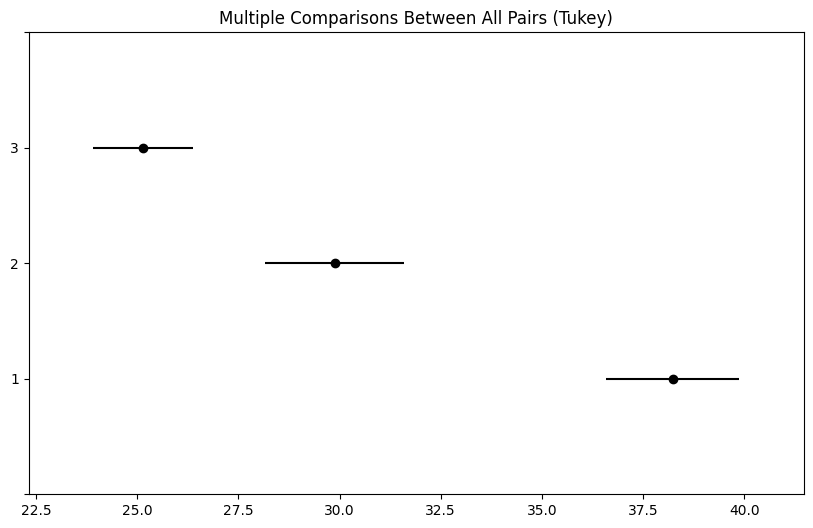

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Pclass'], alpha=0.05) # This line performs Tukey's HSD test on the Age data grouped by Pclass. The endog parameter specifies the dependent variable (age), and groups specifies the independent variable (passenger class). The alpha parameter sets the significance level at 0.05.

tukey.plot_simultaneous() # This line creates a simultaneous comparison plot for the Tukey HSD test results. The plot_simultaneous method visualizes the pairwise comparisons between the groups, showing the confidence intervals for each comparison.

plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red") # This line adds a vertical line to the plot at x=49.57, which is the mean age of passengers in the third class. The ymin and ymax parameters specify the vertical range of the line, and the color parameter sets the line color to red.

pd.DataFrame(tukey.summary()) # This line converts the summary of the Tukey HSD test results into a Pandas DataFrame for easier viewing and interpretation. The summary includes information about the pairwise comparisons, including mean differences, confidence intervals, and significance levels.

<img src="https://r2cdn.perplexity.ai/pplx-full-logo-primary-dark%402x.png" class="logo" width="120"/>

### **Sample ANOVA Interview Questions**

- **When would you use an ANOVA test instead of a t-test?**
*Expected answer:* ANOVA is preferred when you need to compare the means of three or more groups, whereas a t-test is used for comparing the means of two groups.
- **What is the null hypothesis in ANOVA?**
*Expected answer:* The null hypothesis in ANOVA states that all group means are equal.
- **After finding a significant result with ANOVA, what would you do next?**
*Expected answer:* Perform a post hoc test (such as Tukey’s HSD) to determine which specific groups’ means are significantly different from each other.
- **What assumptions must be met for ANOVA to be valid?**
*Expected answer:* The main assumptions are independence of observations, normality of the residuals, and homogeneity of variances across groups.
- **Can you use ANOVA for feature selection? How?**
*Expected answer:* Yes, ANOVA can be used to select features by checking if the means of a feature differ significantly across target groups; features with significant differences are considered important.

---

In [41]:
# Checking the Normality
from scipy.stats import shapiro

# Applying the Shapiro-Wilk test to check the normality of 'Fare' column
shapiro_test = shapiro(df['Fare'])
print('Shapiro-Wilk test for normality of Fare column:', shapiro_test)
# Since the P-value is very small the distribution is not normal

Shapiro-Wilk test for normality of Fare column: ShapiroResult(statistic=np.float64(0.5280936621231834), pvalue=np.float64(7.461943489525117e-40))


In [42]:
from scipy.stats import levene

p_class_levene = levene(df[df['Pclass'] == 1]['Fare'], df[df['Pclass'] == 2]['Fare'], df[df['Pclass'] == 3]['Fare'])
print("Levene's test statistic: ", p_class_levene.statistic)
print("p-value: ", p_class_levene.pvalue)
# Since the P-value < 0.05, there is no equal variance across the categories

Levene's test statistic:  98.44114799983404
p-value:  1.820283344370833e-38


*The assumption require to apply ANOVA is failed. Still for practice we are applying the test*

In [43]:
df = df[['Fare','Pclass']]
df.head()

Fare  Pclass
0   7.2500       3
1  71.2833       1
2   7.9250       3
3  53.1000       1
4   8.0500       3

*H0 - mean(Pclass1) = mean(Pclass2) = mean(Pclass3)<br>
HA - Either any one or all are not equal*

In [44]:
# Required Values
n = len(df) 
k = 3
alpha = 0.05

In [45]:
# Calculating Groud Mean
ground_mean = df['Fare'].mean()
ground_mean

np.float64(34.694514005602244)

In [46]:
import numpy as np
# Calculating Within group and Between group sum of squares
Pclass1_df = df[df['Pclass'] == 1]
Pclass2_df = df[df['Pclass'] == 2]
Pclass3_df = df[df['Pclass'] == 3]

# Within Group Sum of Squares
WSS = np.sum((Pclass1_df['Fare'] - np.mean(Pclass1_df['Fare']))**2) + np.sum((Pclass2_df['Fare'] - np.mean(Pclass2_df['Fare']))**2) + np.sum((Pclass3_df['Fare'] - np.mean(Pclass3_df['Fare']))**2)
print("Within Group Sum of Squares: ", WSS)

# Between Group Sum of Squares
BSS = np.sum(
    (Pclass1_df.shape[0] * (Pclass1_df['Fare'].mean() - df['Fare'].mean()) ** 2) +
    (Pclass2_df.shape[0] * (Pclass2_df['Fare'].mean() - df['Fare'].mean()) ** 2) + 
    (Pclass3_df.shape[0] * (Pclass3_df['Fare'].mean() - df['Fare'].mean()) ** 2)
)
print("Between Group Sum of Squares: ", BSS)

Within Group Sum of Squares:  1275127.1804995076
Between Group Sum of Squares:  721567.3595831523


In [47]:
# Calaulating Sum of Squares Total
TSS = np.sum((df['Fare'] - df['Fare'].mean()) ** 2)
print("Sum of Squares Total: ", TSS)

Sum of Squares Total:  1996694.54008266


In [48]:
# Calculating Degree of Freedom
dof_ssb = k - 1
dof_ssw = n - k
print(dof_ssw, dof_ssb)

711 2


In [49]:
# Calculating Mean Squared Between and Mean Squared Within
MSB = BSS / dof_ssb
MSW = WSS / dof_ssw
print(MSB, MSW)

360783.67979157617 1793.427820674413


In [50]:
# Calculating F-Statistic
f_statistic = MSB / MSW
print(f_statistic)

201.16989132905533


In [51]:
# Calculating the p-value
import scipy.stats as stats
p_value = stats.f.sf(f_statistic, dof_ssb, dof_ssw)
print(p_value)

5.80077208465038e-70


*The ANOVA test reveals that there is a statistically significant difference in the means of the three groups (p-value < 0.05).*